# 1-逻辑回归解决多分类问题
## 案例：手写数字识别
### 数据集：ex3data1.mat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
data = sio.loadmat('ex3data1.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
raw_X = data['X']
raw_y = data['y']

In [7]:
print(raw_X.shape,raw_y.shape)

(5000, 400) (5000, 1)


In [15]:
def plot_an_image(X):
    """打印一张图片函数"""
    pick_one = np.random.randint(5000)
    image = X[pick_one,:]
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r') #还原成20×20维度，并转置
    
    plt.xticks([])
    plt.yticks([]) #去除x，y轴的刻度

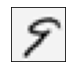

In [16]:
plot_an_image(raw_X)

In [18]:
def plot_100_image(X):
    """打印100张图片"""
    sample_index = np.random.choice(len(X),100) #随机选择100个样本
    images = X[sample_index,:]
    fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True) #设置打印10行10列，共享x，y轴属性
    plt.xticks([])
    plt.yticks([]) #去除x，y轴的刻度
    
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T,cmap='gray_r')

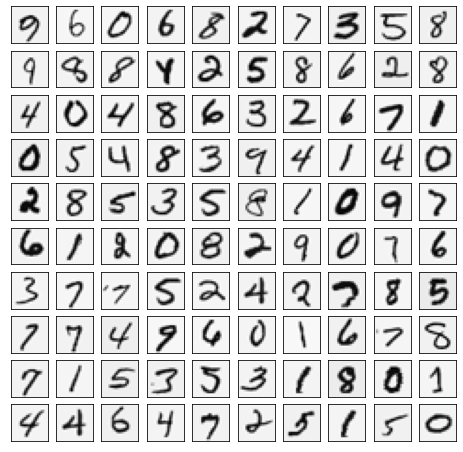

In [19]:
plot_100_image(raw_X)

In [20]:
def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

In [21]:
def costFunction(theta,X,y,lamda):
    
    y_ = sigmoid(X@theta)
    first = y * np.log(y_)
    second = (1-y) * np.log(1-y_)
#     reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X)))
    reg = theta[1:] @ theta[1:] * (lamda / (2 * len(X))) #theta改为1维数组，只需内积
    
    return - np.sum(first+second) / len(X) + reg

In [23]:
def gradient_reg(theta,X,y,lamda):
    """梯度向量函数"""
    first = (X.T @ (sigmoid(X @ theta) - y)) / len(X)
    reg = theta[1:] * (lamda / len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    
    return first + reg

In [25]:
X = np.insert(raw_X,0,values=1,axis=1) #插入全1列构造数据集
X.shape

(5000, 401)

In [26]:
y = raw_y.flatten() #将二维数组转换为一维数组
y.shape

(5000,)

In [28]:
from scipy.optimize import minimize

def one_vs_all(X,y,lamda,K):
    """多分类器求解函数"""
    n = X.shape[1]
    
    theta_all = np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i = np.zeros(n,)
        res = minimize(fun=costFunction,x0=theta_i,args=(X,y==i,lamda),method='TNC',jac=gradient_reg)
        theta_all[i-1] = res.x
        
    return theta_all

In [29]:
lamda = 1
K = 10

In [31]:
theta_final = one_vs_all(X,y,lamda,K)

In [32]:
theta_final

array([[-2.38187334e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30433279e-03, -7.29580949e-10,  0.00000000e+00],
       [-3.18303389e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46340729e-03, -5.08870029e-04,  0.00000000e+00],
       [-4.79638233e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87468695e-05, -2.47395863e-07,  0.00000000e+00],
       ...,
       [-7.98700752e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94576566e-05,  7.21256372e-06,  0.00000000e+00],
       [-4.57358931e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33390955e-03,  9.96868542e-05,  0.00000000e+00],
       [-5.40542751e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16613537e-04,  7.88124085e-06,  0.00000000e+00]])

In [34]:
def predict(X,theta_final):
    """预测函数"""
    h = sigmoid(X @ theta_final.T) #(5000,401)(10,401)=>(5000,10)
    
    h_argmax = np.argmax(h,axis=1) #返回每行中最大数的索引
    
    return h_argmax + 1

In [35]:
y_pred = predict(X,theta_final)

In [36]:
acc = np.mean(y_pred == y)

In [37]:
acc

0.9446